# Application of Decision Tree on Iris Dataset

In [1]:
# Load the Libraries
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
from warnings import filterwarnings
filterwarnings(action='ignore')

In [2]:
# Load the dataset
iris= load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
# Observations of first 5 samples' features
iris.data[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [4]:
# Corresponding target variables of first 5 samples
iris.target[0:5]

array([0, 0, 0, 0, 0])

In [5]:
# Description of Iris Dataset
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

# Training and Visualization of Decision Tree

We will convert the given numpy array data into pandas DataFrame for easy visualization of the given Iris Dataset.

In [6]:
import pandas as pd

In [7]:
# Coversion of numpy array data into pandas DataFrame
df_data= pd.DataFrame(data=iris.data, columns=iris.feature_names)
df_target= pd.DataFrame(data= iris.target, columns=['class'])
df= df_data.join(df_target)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
# Seperate the dependent variables(x) and independent variable(y)
x= df.drop('class', axis=1)
y= df['class']

In [9]:
# Train the Decision Tree and check its accuracy
tree= DecisionTreeClassifier(random_state=42)
tree.fit(x,y)
ypred= tree.predict(x)
print('Accuracy Score', accuracy_score(y, ypred))

Accuracy Score 1.0


In [10]:
# Cross-Validation Accuracy Score with 10 folds 
from sklearn.model_selection import cross_val_score
ypred= cross_val_score(tree, x, y, cv=50, scoring='accuracy')
ypred.mean()

0.94

In [11]:
# Formation of trained Decision Tree into .dot format
from sklearn.tree import export_graphviz
export_graphviz(tree, 
                out_file="full_iris_tree.dot",
                feature_names=iris.feature_names,
                class_names=iris.target_names,
                rounded=True, filled=True)

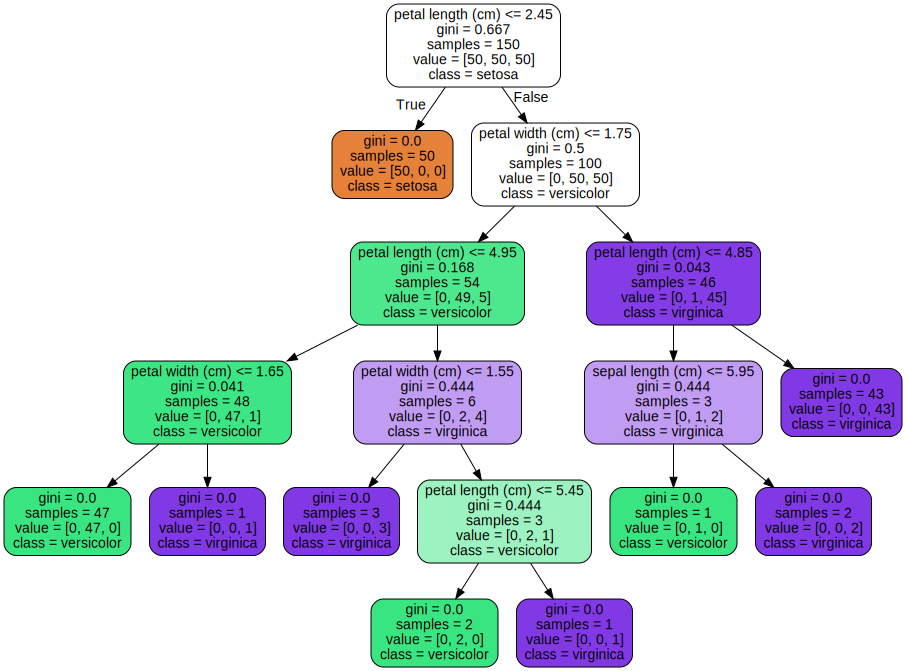

In [12]:
# Visualization of trained Decision Tree
import graphviz
with open("full_iris_tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

# Regularized Hyperparameters

For regularization of hyperparameters, we will use GridSearchCV.

In [13]:
from sklearn.model_selection import GridSearchCV
param_grid = [{'criterion': ['gini', 'entropy'], 'splitter': ['best','random'], 
               'max_depth': [2,3,4,5,6], 'max_features': [2,3,4]}]
grid_search= GridSearchCV(tree, param_grid, cv=50, scoring='accuracy', return_train_score=True)
grid_search.fit(x, y)

GridSearchCV(cv=50, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'criterion': ['gini', 'entropy'],
                   

In [14]:
# Best Hyperparameters
grid_search.best_params_            

{'criterion': 'gini', 'max_depth': 3, 'max_features': 3, 'splitter': 'best'}

In [15]:
# Best Accuracy Score
grid_search.best_score_

0.9666666666666666

In [16]:
# Best Estimator
best_tree= grid_search.best_estimator_
best_tree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [17]:
# Applying the best estimator on the Iris Dataset
best_tree.fit(x,y)
best_tree_ypred= best_tree.predict(x)
print('Accuracy Score', accuracy_score(y, best_tree_ypred))

Accuracy Score 0.9733333333333334


In [18]:
# Cross-Validation Accuracy Score with 10 folds after regularization of hyperparameters
from sklearn.model_selection import cross_val_score
ypred= cross_val_score(best_tree, x, y, cv=50, scoring='accuracy')
ypred.mean()

0.9666666666666666

In [19]:
# Formation of trained Decision Tree into .dot format
from sklearn.tree import export_graphviz
export_graphviz(best_tree, 
                out_file="best_iris_tree.dot",
                feature_names=iris.feature_names,
                class_names=iris.target_names,
                rounded=True, filled=True)

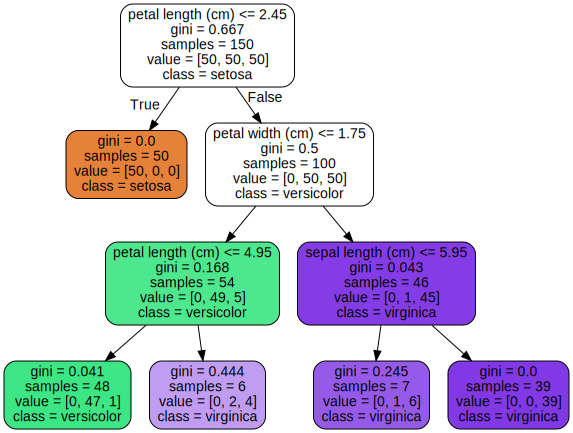

In [20]:
# Visualization of trained Decision Tree
import graphviz
with open("best_iris_tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

# Conclusion

In [21]:
# Tabular form of all above obtained results
table=pd.DataFrame({'Decision Tree Model': ['Non-Regularized', 'Regularized'],
             'Training Accuracy Score': [1.0, 0.9733],
             'Cross-Validation Accuracy Score with 10 folds': [0.94, 0.9667],
             'Conclusion': ['More difference between Training and Cross-Validation Accuracy Score', 
                            'Less difference between Training and Cross-Validation Accuracy Score'],
             'Result': ['Overfit', 'Good Fit']})
table

,Decision Tree Model,Training Accuracy Score,Cross-Validation Accuracy Score with 10 folds,Conclusion,Result
0,Non-Regularized,1.0000,0.9400,More difference between Training and Cross-Val...,Overfit
1,Regularized,0.9733,0.9667,Less difference between Training and Cross-Val...,Good Fit


### Conclusion: 

__Regularized Decision Tree model is better__ than the non-regularized Decision Tree model.